In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
# Definitions

base_dir = './output'

images_dir = './images'

class_names = ['Car', 'Pedestrian', 'Cyclist']

headings = ['model', 'accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'memory_usage_mean_mb', 'memory_usage_std_mb', 'gpu_memory_usage_mean_mb', 'gpu_memory_usage_std_mb', 'per_object_memory_usage_mean_mb', 'per_object_memory_usage_std_mb', 'per_object_gpu_memory_usage_mean_mb', 'per_object_gpu_memory_usage_std_mb', 'inference_time_mean_sec', 'inference_time_std_sec', 'per_object_inference_time_mean_sec', 'per_object_inference_time_std_sec', 'num_samples', 'num_classes', 'model_memory_footprint_mb', 'model_gpu_memory_footprint_mb', 'car_precision', 'car_recall', 'car_f1', 'pedestrian_precision', 'pedestrian_recall', 'pedestrian_f1', 'cyclist_precision', 'cyclist_recall', 'cyclist_f1']

headings_labels = ['Model', 'Accuracy', 'Precision (Macro)', 'Recall (Macro)', 'F1 Score (Macro)', 'Precision (Weighted)', 'Recall (Weighted)', 'F1 Score (Weighted)', 'Memory Usage (Mean, MB)', 'Memory Usage (Std, MB)', 'GPU Memory Usage (Mean, MB)', 'GPU Memory Usage (Std, MB)', 'Per Object Memory Usage (Mean, MB)', 'Per Object Memory Usage (Std, MB)', 'Per Object GPU Memory Usage (Mean, MB)', 'Per Object GPU Memory Usage (Std, MB)', 'Inference Time (Mean, Sec)', 'Inference Time (Std, Sec)', 'Per Object Inference Time (Mean, Sec)', 'Per Object Inference Time (Std, Sec)', 'Number of Samples', 'Number of Classes', 'Model Memory Footprint (MB)', 'Model GPU memory footprint (MB)', 'Car Precision', 'Car Recall', 'Car F1', 'Pedestrian Precision', 'Pedestrian Recall', 'Pedestrian F1', 'Cyclist Precision', 'Cyclist Recall', 'Cyclist F1']

assert len(headings) == len(headings_labels), "Headings and labels must have the same length"

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [3]:
if not os.path.exists(images_dir):

	os.system("mkdir -p " + images_dir)

else :

	files = os.listdir(images_dir)

	for file in files:

		if 'confusion_matrix' not in file:

			os.remove(os.path.join(images_dir, file))

In [4]:
pointnet_data = pd.read_csv(os.path.join(base_dir, 'pointnet_real_classification_results.csv'))
pointnetpp_data = pd.read_csv(os.path.join(base_dir, 'pointnetpp_real_classification_results.csv'))
pointpillars_data = pd.read_csv(os.path.join(base_dir, 'pointpillar_classification_results.csv'))
pointrcnn_data = pd.read_csv(os.path.join(base_dir, 'pointrcnn_classification_results.csv'))

pointnet_data['model'] = 'PointNet'
pointnetpp_data['model'] = 'PointNet++'
pointpillars_data['model'] = 'PointPillars'
pointrcnn_data['model'] = 'PointRCNN'

data = pd.concat([pointnet_data, pointnetpp_data, pointpillars_data, pointrcnn_data], axis=0)


In [5]:
data_copy = data.copy()

metrics = ['model', 'per_object_memory_usage_mean_mb', 'per_object_gpu_memory_usage_mean_mb', 'model_memory_footprint_mb', 'model_gpu_memory_footprint_mb']
metrics_data = data_copy[metrics]
metrics_data.columns = [headings_labels[headings.index(col)] for col in metrics]
latex_table = metrics_data.to_latex(index=False, float_format="%.3f", escape=False)
print(latex_table)

metrics = ['model', 'per_object_inference_time_mean_sec', 'inference_time_mean_sec']
metrics_data = data_copy[metrics]
metrics_data.columns = [headings_labels[headings.index(col)] for col in metrics]
latex_table = metrics_data.to_latex(index=False, float_format="%.3f", escape=False)
print(latex_table)

metrics = ['model', 'accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'precision_weighted', 'recall_weighted', 'f1_weighted']
metrics_data = data_copy[metrics]
metrics_data.columns = [headings_labels[headings.index(col)] for col in metrics]
latex_table = metrics_data.to_latex(index=False, float_format="%.3f", escape=False)
print(latex_table)

\begin{tabular}{lrrrr}
\toprule
Model & Per Object Memory Usage (Mean, MB) & Per Object GPU Memory Usage (Mean, MB) & Model Memory Footprint (MB) & Model GPU memory footprint (MB) \\
\midrule
PointNet & 2.691 & 16.281 & 0.686 & 25.951 \\
PointNet++ & 2.826 & 21.873 & 0.457 & 35.731 \\
PointPillars & 6.082 & 137.077 & 47.144 & 29.518 \\
PointRCNN & 0.824 & 212.975 & 46.426 & 45.050 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrr}
\toprule
Model & Per Object Inference Time (Mean, Sec) & Inference Time (Mean, Sec) \\
\midrule
PointNet & 0.003 & 0.011 \\
PointNet++ & 0.148 & 0.579 \\
PointPillars & 0.025 & 0.097 \\
PointRCNN & 0.272 & 1.056 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrrrr}
\toprule
Model & Accuracy & Precision (Macro) & Recall (Macro) & F1 Score (Macro) & Precision (Weighted) & Recall (Weighted) & F1 Score (Weighted) \\
\midrule
PointNet & 0.989 & 0.964 & 0.953 & 0.958 & 0.989 & 0.989 & 0.989 \\
PointNet++ & 0.907 & 0.887 & 0.642 & 0.720 & 0.908 & 0.907 & 0.894 \\


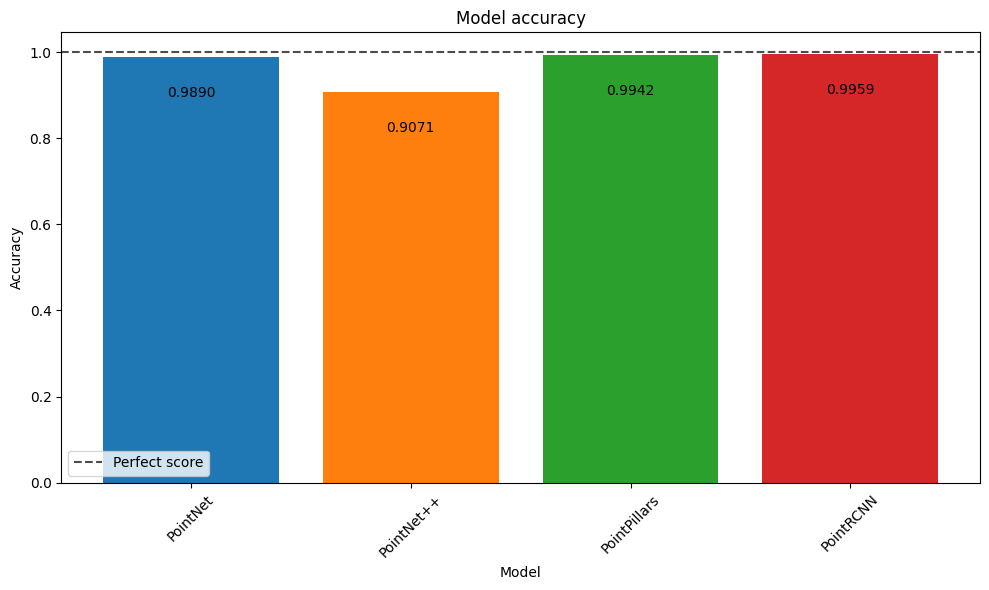

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))
bars = plt.bar(data['model'], data['accuracy'], color=colors[:len(data['model'])])

for bar in bars:

	height = bar.get_height()

	ax.text(
		bar.get_x() + bar.get_width() / 2,
		height - 0.1,
		f'{height:.4f}',
		ha='center',
		va='bottom'
	)

ax.axhline(y=1.0, color='black', linestyle='--', alpha=0.7, label='Perfect score')

plt.title('Model accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()


plt.savefig(os.path.join(images_dir, 'accuracy.png'))
plt.savefig(os.path.join(images_dir, 'accuracy.pdf'))
plt.show()


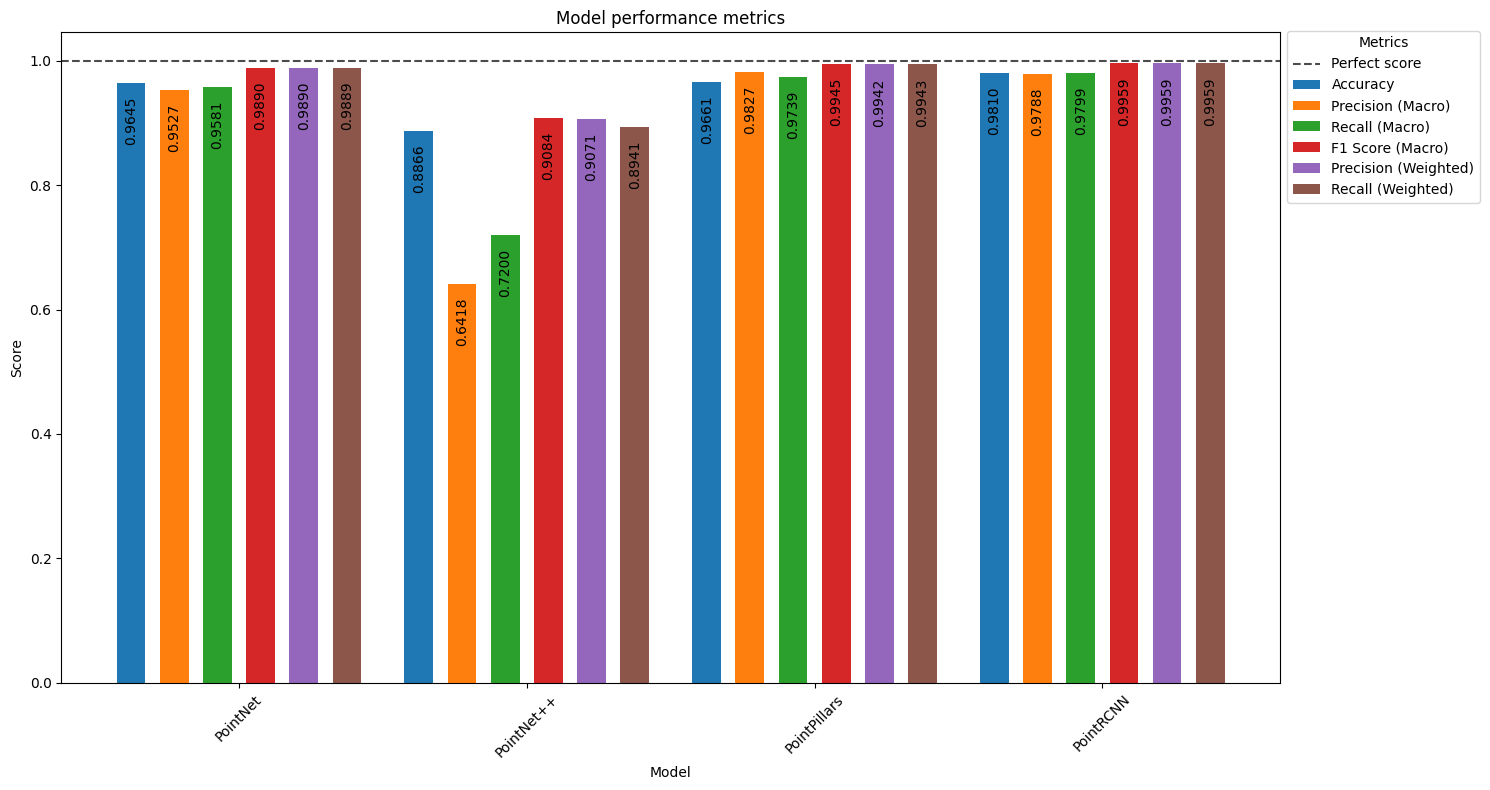

In [7]:
fig, ax = plt.subplots(figsize=(15, 8))

metrics = ['precision_macro', 'recall_macro', 'f1_macro', 'precision_weighted', 'recall_weighted', 'f1_weighted']
n_metrics = len(metrics)
bar_width = 0.1
bar_spacing = 0.05
group_width = n_metrics * (bar_width + bar_spacing)

models = data['model'].unique()
n_models = len(models)

x = np.arange(n_models)

for i, metric in enumerate(metrics):

	metric_values = [data[data['model'] == model][metric].values[0] for model in models]

	bars = ax.bar(x + i * (bar_width + bar_spacing), metric_values, width=bar_width, label=headings_labels[i + 1])

	for j, bar in enumerate(bars):

		height = bar.get_height()

		ax.text(
			bar.get_x() + bar.get_width() / 2,
			height - 0.1,
			f'{height:.4f}',
			ha='center',
			va='bottom',
			rotation=90,
		)

ax.axhline(y=1.0, color='black', linestyle='--', alpha=0.7, label='Perfect score')

plt.title('Model performance metrics')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(x + (n_metrics - 1) * (bar_width + bar_spacing) / 2, models, rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1.0129), title='Metrics')
plt.tight_layout()

plt.savefig(os.path.join(images_dir, 'model_performance_metrics.png'))
plt.savefig(os.path.join(images_dir, 'model_performance_metrics.pdf'))

plt.show()

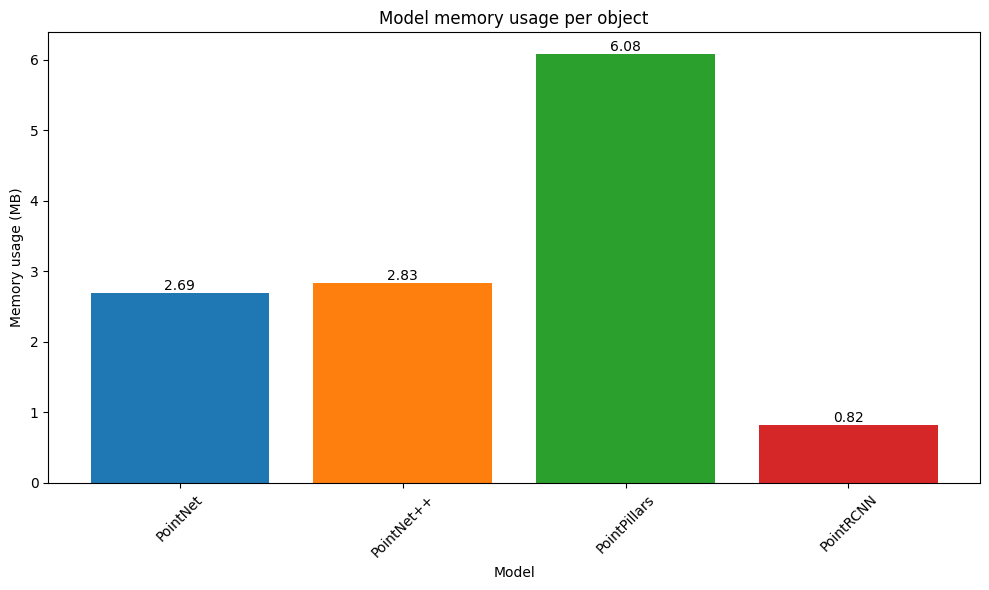

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
bars = plt.bar(data['model'], data['per_object_memory_usage_mean_mb'], color=colors[:len(data['model'])])

for bar in bars:

	height = bar.get_height()

	ax.text(
		bar.get_x() + bar.get_width() / 2,
		height,
		f'{height:.2f}',
		ha='center',
		va='bottom'
	)

plt.title('Model memory usage per object')
plt.xlabel('Model')
plt.ylabel('Memory usage (MB)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig(os.path.join(images_dir, 'memory_usage.png'))
plt.savefig(os.path.join(images_dir, 'memory_usage.pdf'))

plt.show()

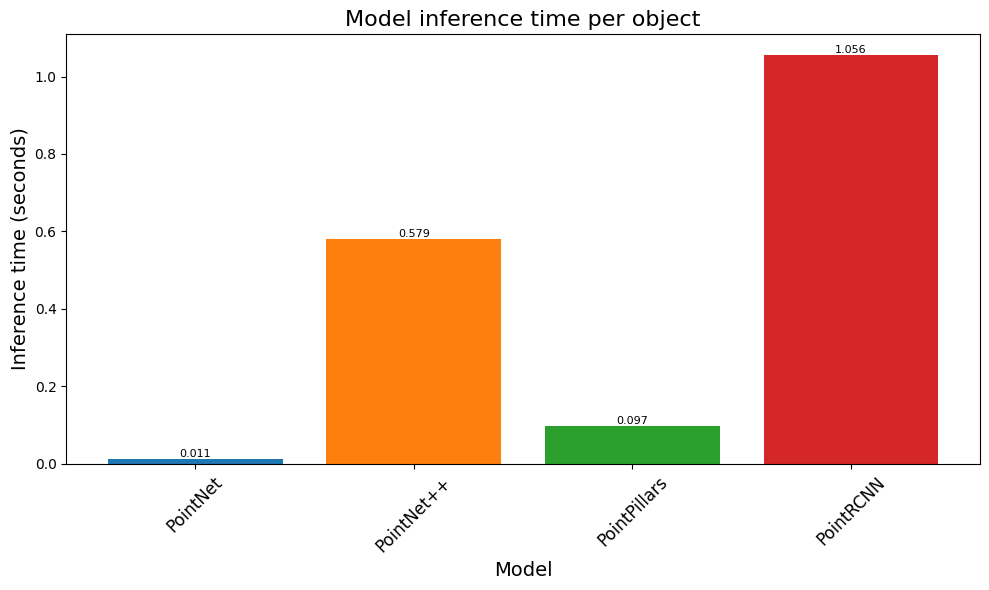

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))

bars = plt.bar(data['model'], data['inference_time_mean_sec'], color=colors[:len(data['model'])])

for bar in bars:

	height = bar.get_height()

	ax.text(
		bar.get_x() + bar.get_width() / 2,
		height,
		f'{height:.3f}',
		ha='center',
		va='bottom',
		fontsize=8
	)

plt.title('Model inference time per object', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Inference time (seconds)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()

plt.savefig(os.path.join(images_dir, 'inference_time.png'))
plt.savefig(os.path.join(images_dir, 'inference_time.pdf'))

plt.show()

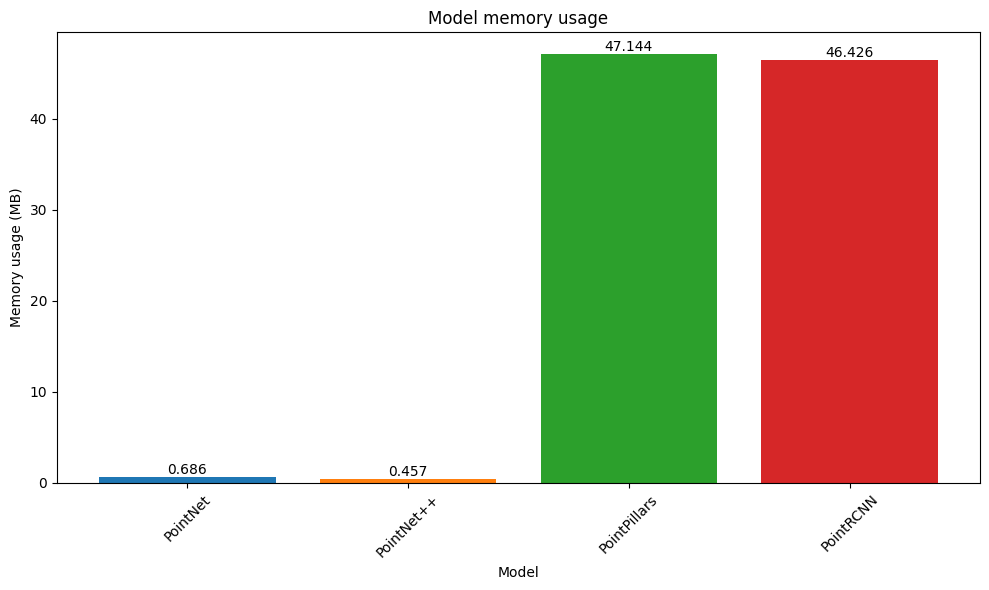

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))

bars = plt.bar(data['model'], data['model_memory_footprint_mb'], color=colors[:len(data['model'])])

for bar in bars:

	height = bar.get_height()

	ax.text(
		bar.get_x() + bar.get_width() / 2,
		height,
		f'{height:.3f}',
		ha='center',
		va='bottom'
	)

plt.title('Model memory usage')
plt.xlabel('Model')
plt.ylabel('Memory usage (MB)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig(os.path.join(images_dir, 'model_memory_usage.png'))
plt.savefig(os.path.join(images_dir, 'model_memory_usage.pdf'))

plt.show()